In [119]:
import pandas as pd
import numpy as np

In [120]:
bank=pd.read_excel("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Logistic Regression\\bank-full.xlsx")
bank

,y,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,contact
0,0,5,may,261,58,management,married,tertiary,unk0wn,0,2143,1,0,1,-1,0,unk0wn
1,0,5,may,151,44,technician,single,secondary,unk0wn,0,29,1,0,1,-1,0,unk0wn
2,0,5,may,76,33,entrepreneur,married,secondary,unk0wn,0,2,1,1,1,-1,0,unk0wn
3,0,5,may,92,47,blue-collar,married,unk0wn,unk0wn,0,1506,1,0,1,-1,0,unk0wn
4,0,5,may,198,33,unk0wn,single,unk0wn,unk0wn,0,1,0,0,1,-1,0,unk0wn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,17,0v,977,51,technician,married,tertiary,unk0wn,0,825,0,0,3,-1,0,cellular
45207,1,17,0v,456,71,retired,divorced,primary,unk0wn,0,1729,0,0,2,-1,0,cellular
45208,1,17,0v,1127,72,retired,married,secondary,success,0,5715,0,0,5,184,3,cellular
45209,0,17,0v,508,57,blue-collar,married,secondary,unk0wn,0,668,0,0,4,-1,0,telephone


In [121]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   y          45211 non-null  int64 
 1   day        45211 non-null  int64 
 2   month      45211 non-null  object
 3   duration   45211 non-null  int64 
 4   age        45211 non-null  int64 
 5   job        45211 non-null  object
 6   marital    45211 non-null  object
 7   education  45211 non-null  object
 8   poutcome   45211 non-null  object
 9   default    45211 non-null  int64 
 10  balance    45211 non-null  int64 
 11  housing    45211 non-null  int64 
 12  loan       45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  contact    45211 non-null  object
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [122]:
#Dropping only CONTACT column as mode of contact is insignificant while duration column is self explanatory that the customer was contacted
bank1=bank.drop(['contact'],axis=1)

In [123]:
#Label encoding on Job,marital,education,poutcome
bank2=bank1.copy()

In [124]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
bank2.job=labelencoder.fit_transform(bank1.job)
bank2.marital=labelencoder.fit_transform(bank1.marital)
bank2.education=labelencoder.fit_transform(bank1.education)
bank2.poutcome=labelencoder.fit_transform(bank1.poutcome)
bank2.month=labelencoder.fit_transform(bank1.month)
bank2

,y,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous
0,0,5,9,261,58,4,1,2,3,0,2143,1,0,1,-1,0
1,0,5,9,151,44,9,2,1,3,0,29,1,0,1,-1,0
2,0,5,9,76,33,2,1,1,3,0,2,1,1,1,-1,0
3,0,5,9,92,47,1,1,3,3,0,1506,1,0,1,-1,0
4,0,5,9,198,33,11,2,3,3,0,1,0,0,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,17,0,977,51,9,1,2,3,0,825,0,0,3,-1,0
45207,1,17,0,456,71,5,0,0,3,0,1729,0,0,2,-1,0
45208,1,17,0,1127,72,5,1,1,2,0,5715,0,0,5,184,3
45209,0,17,0,508,57,1,1,1,3,0,668,0,0,4,-1,0


In [125]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   y          45211 non-null  int64
 1   day        45211 non-null  int64
 2   month      45211 non-null  int32
 3   duration   45211 non-null  int64
 4   age        45211 non-null  int64
 5   job        45211 non-null  int32
 6   marital    45211 non-null  int32
 7   education  45211 non-null  int32
 8   poutcome   45211 non-null  int32
 9   default    45211 non-null  int64
 10  balance    45211 non-null  int64
 11  housing    45211 non-null  int64
 12  loan       45211 non-null  int64
 13  campaign   45211 non-null  int64
 14  pdays      45211 non-null  int64
 15  previous   45211 non-null  int64
dtypes: int32(5), int64(11)
memory usage: 4.7 MB


In [126]:
bnk=bank2.iloc[:,1:]
bnk

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous
0,5,9,261,58,4,1,2,3,0,2143,1,0,1,-1,0
1,5,9,151,44,9,2,1,3,0,29,1,0,1,-1,0
2,5,9,76,33,2,1,1,3,0,2,1,1,1,-1,0
3,5,9,92,47,1,1,3,3,0,1506,1,0,1,-1,0
4,5,9,198,33,11,2,3,3,0,1,0,0,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,17,0,977,51,9,1,2,3,0,825,0,0,3,-1,0
45207,17,0,456,71,5,0,0,3,0,1729,0,0,2,-1,0
45208,17,0,1127,72,5,1,1,2,0,5715,0,0,5,184,3
45209,17,0,508,57,1,1,1,3,0,668,0,0,4,-1,0


In [127]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,2))
d=scaler.fit_transform(bnk)
columns=bnk.columns
bank2=pd.DataFrame(d,columns=columns)
bank2['y']=bank['y']
bank2

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y
0,1.133333,1.818182,1.053070,1.519481,1.363636,1.5,1.666667,2.000000,1.0,1.092259,2.0,1.0,1.000000,1.000000,1.000000,0
1,1.133333,1.818182,1.030704,1.337662,1.818182,2.0,1.333333,2.000000,1.0,1.073067,2.0,1.0,1.000000,1.000000,1.000000,0
2,1.133333,1.818182,1.015453,1.194805,1.181818,1.5,1.333333,2.000000,1.0,1.072822,2.0,2.0,1.000000,1.000000,1.000000,0
3,1.133333,1.818182,1.018707,1.376623,1.090909,1.5,2.000000,2.000000,1.0,1.086476,2.0,1.0,1.000000,1.000000,1.000000,0
4,1.133333,1.818182,1.040260,1.194805,2.000000,2.0,2.000000,2.000000,1.0,1.072812,1.0,1.0,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.533333,1.000000,1.198658,1.428571,1.818182,1.5,1.666667,2.000000,1.0,1.080293,1.0,1.0,1.032258,1.000000,1.000000,1
45207,1.533333,1.000000,1.092721,1.688312,1.454545,1.0,1.000000,2.000000,1.0,1.088501,1.0,1.0,1.016129,1.000000,1.000000,1
45208,1.533333,1.000000,1.229158,1.701299,1.454545,1.5,1.333333,1.666667,1.0,1.124689,1.0,1.0,1.064516,1.212156,1.010909,1
45209,1.533333,1.000000,1.103294,1.506494,1.090909,1.5,1.333333,2.000000,1.0,1.078868,1.0,1.0,1.048387,1.000000,1.000000,0


day              AxesSubplot(0.125,0.71587;0.168478x0.16413)
month         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
duration      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
age           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
job             AxesSubplot(0.125,0.518913;0.168478x0.16413)
marital      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
education    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
poutcome     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
default         AxesSubplot(0.125,0.321957;0.168478x0.16413)
balance      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
housing      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
loan         AxesSubplot(0.731522,0.321957;0.168478x0.16413)
campaign           AxesSubplot(0.125,0.125;0.168478x0.16413)
pdays           AxesSubplot(0.327174,0.125;0.168478x0.16413)
previous        AxesSubplot(0.529348,0.125;0.168478x0.16413)
y               AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

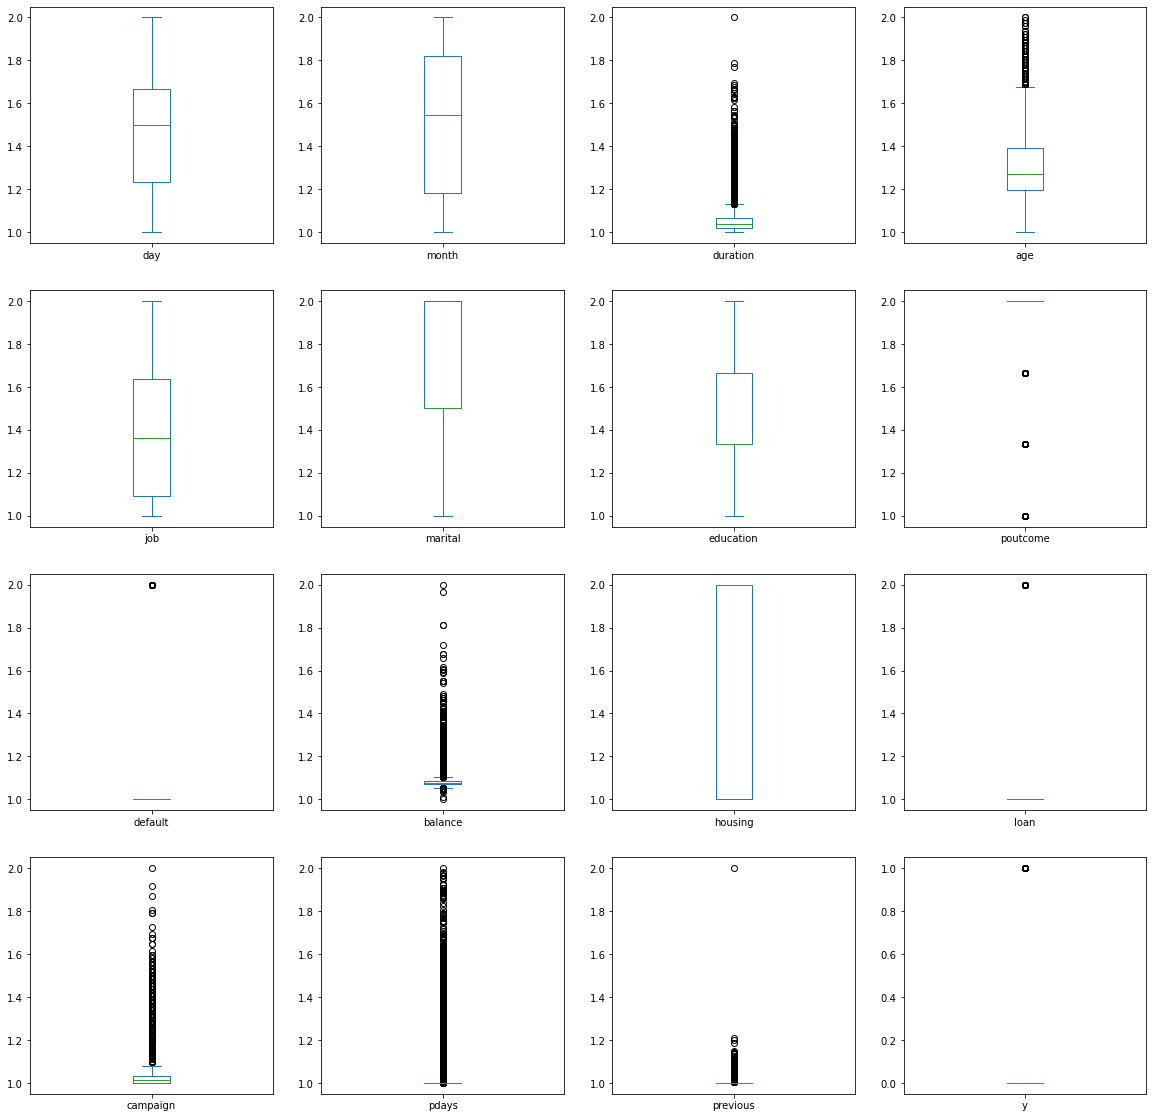

In [128]:
bank2.plot(kind='box',subplots=True, layout=(4,4), figsize=(20,20))


In [129]:
bank2.corr()

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y
day,1.000000,-0.088266,-0.030206,-0.009120,0.022856,-0.005261,0.022671,0.083460,0.009424,0.004503,-0.027982,0.011370,0.162490,-0.093044,-0.051710,-0.028348
month,-0.088266,1.000000,0.009958,-0.070951,-0.096127,0.016565,-0.089275,0.057446,0.006430,-0.085840,0.255259,0.006125,-0.024698,0.018518,-0.016245,-0.018841
duration,-0.030206,0.009958,1.000000,-0.004648,0.004744,0.011852,0.001935,0.010925,-0.010021,0.021560,0.005075,-0.012412,-0.084570,-0.001565,0.001203,0.394521
age,-0.009120,-0.070951,-0.004648,1.000000,-0.021868,-0.403240,-0.106807,0.007367,-0.017879,0.097783,-0.185513,-0.015655,0.004760,-0.023758,0.001288,0.025155
job,0.022856,-0.096127,0.004744,-0.021868,1.000000,0.062045,0.166707,0.011010,-0.006853,0.018232,-0.125363,-0.033004,0.006839,-0.024455,-0.000911,0.040438
marital,-0.005261,0.016565,0.011852,-0.403240,0.062045,1.000000,0.108576,-0.016850,-0.007023,0.002122,-0.016096,-0.046893,-0.008994,0.019172,0.014973,0.045588
education,0.022671,-0.089275,0.001935,-0.106807,0.166707,0.108576,1.000000,-0.019361,-0.010718,0.064514,-0.090790,-0.048574,0.006255,0.000052,0.017570,0.066241
poutcome,0.083460,0.057446,0.010925,0.007367,0.011010,-0.016850,-0.019361,1.000000,0.034898,-0.020967,-0.099971,0.015458,0.101588,-0.858362,-0.489752,-0.077840
default,0.009424,0.006430,-0.010021,-0.017879,-0.006853,-0.007023,-0.010718,0.034898,1.000000,-0.066745,-0.006025,0.077234,0.016822,-0.029979,-0.018329,-0.022419
balance,0.004503,-0.085840,0.021560,0.097783,0.018232,0.002122,0.064514,-0.020967,-0.066745,1.000000,-0.068768,-0.084350,-0.014578,0.003435,0.016674,0.052838


In [130]:
corre=bank2.corr()
mask=(bank2.corr()>0.3)&(bank2.corr()<1.0)
high_corr=corre[mask]
high_corr
#there is no high(>0.75) pearson correlation(r) between the indpendent variables that may affect the model


,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394521
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
bank2.describe()

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.493547,1.510525,1.052494,1.297873,1.394524,1.583862,1.408271,1.853325,1.018027,1.085171,1.555838,1.160226,1.028449,1.047245,1.002110,0.116985
std,0.277416,0.296479,0.052364,0.137906,0.297514,0.304115,0.249332,0.329686,0.133049,0.027643,0.496878,0.366820,0.049968,0.114827,0.008376,0.321406
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.233333,1.181818,1.020943,1.194805,1.090909,1.500000,1.333333,2.000000,1.000000,1.073457,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.500000,1.545455,1.036600,1.272727,1.363636,1.500000,1.333333,2.000000,1.000000,1.076871,2.000000,1.000000,1.016129,1.000000,1.000000,0.000000
75%,1.666667,1.818182,1.064864,1.389610,1.636364,2.000000,1.666667,2.000000,1.000000,1.085768,2.000000,1.000000,1.032258,1.000000,1.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


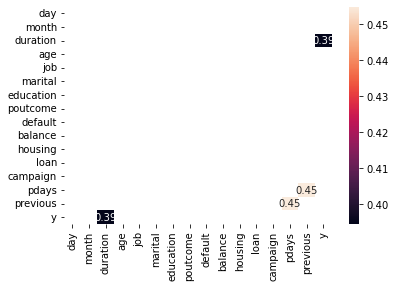

In [132]:
import seaborn as sns
#import matplotlib.pyplot as plt
#plt.figure(figsize=(15,7))
sns.heatmap(high_corr,annot=True);
#plt.show()


In [133]:
#check for PPS score
import ppscore as pps
pps.score(bank2,"duration","y")

{'x': 'duration',
 'y': 'y',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.118,
 'model_score': 0.1642944180217787,
 'model': DecisionTreeRegressor()}

In [134]:
pps_score_bank2=pps.matrix(bank2)
pps_score_bank2

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,day,day,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,day,month,0.043971,regression,True,mean absolute error,0.250727,0.239702,DecisionTreeRegressor()
2,day,duration,0.000000,regression,True,mean absolute error,0.031938,0.034725,DecisionTreeRegressor()
3,day,age,0.000000,regression,True,mean absolute error,0.112668,0.113863,DecisionTreeRegressor()
4,day,job,0.000000,regression,True,mean absolute error,0.244491,0.250435,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,y,loan,0.000000,regression,True,mean absolute error,0.156000,0.262278,DecisionTreeRegressor()
252,y,campaign,0.000000,regression,True,mean absolute error,0.025123,0.028963,DecisionTreeRegressor()
253,y,pdays,0.000000,regression,True,mean absolute error,0.046082,0.074804,DecisionTreeRegressor()
254,y,previous,0.000000,regression,True,mean absolute error,0.002080,0.003346,DecisionTreeRegressor()


In [135]:
pps_score_bank2[pps_score_bank2['ppscore']>0.75] 
#pps(predictive power score) used to identify correlation between variables for classification data

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,day,day,1.0,predict_itself,True,None,0.0,1.0,None
17,month,month,1.0,predict_itself,True,None,0.0,1.0,None
34,duration,duration,1.0,predict_itself,True,None,0.0,1.0,None
51,age,age,1.0,predict_itself,True,None,0.0,1.0,None
68,job,job,1.0,predict_itself,True,None,0.0,1.0,None
85,marital,marital,1.0,predict_itself,True,None,0.0,1.0,None
102,education,education,1.0,predict_itself,True,None,0.0,1.0,None
119,poutcome,poutcome,1.0,predict_itself,True,None,0.0,1.0,None
136,default,default,1.0,predict_itself,True,None,0.0,1.0,None
153,balance,balance,1.0,predict_itself,True,None,0.0,1.0,None


In [136]:
#Detecting outliers using Isolation Forest
from sklearn.ensemble import IsolationForest
clf= IsolationForest(random_state=0,contamination=0.1)
clf.fit(bank2)


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=0)

In [137]:
bank2['anomaly']=clf.predict(bank2.iloc[:,:])

In [138]:
bank2[bank2['y']==0]

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y,anomaly
0,1.133333,1.818182,1.053070,1.519481,1.363636,1.5,1.666667,2.000000,1.0,1.092259,2.0,1.0,1.000000,1.000000,1.000000,0,1
1,1.133333,1.818182,1.030704,1.337662,1.818182,2.0,1.333333,2.000000,1.0,1.073067,2.0,1.0,1.000000,1.000000,1.000000,0,1
2,1.133333,1.818182,1.015453,1.194805,1.181818,1.5,1.333333,2.000000,1.0,1.072822,2.0,2.0,1.000000,1.000000,1.000000,0,1
3,1.133333,1.818182,1.018707,1.376623,1.090909,1.5,2.000000,2.000000,1.0,1.086476,2.0,1.0,1.000000,1.000000,1.000000,0,1
4,1.133333,1.818182,1.040260,1.194805,2.000000,2.0,2.000000,2.000000,1.0,1.072812,1.0,1.0,1.000000,1.000000,1.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,1.500000,1.000000,1.032940,1.532468,1.363636,1.5,1.666667,1.000000,1.0,1.074056,2.0,2.0,1.016129,1.215596,1.018182,0,-1
45198,1.500000,1.000000,1.067710,1.246753,1.363636,1.5,1.666667,2.000000,1.0,1.085768,1.0,1.0,1.016129,1.000000,1.000000,0,1
45199,1.500000,1.000000,1.237088,1.207792,1.090909,2.0,1.333333,1.333333,1.0,1.086195,2.0,1.0,1.032258,1.608945,1.043636,0,-1
45209,1.533333,1.000000,1.103294,1.506494,1.090909,1.5,1.333333,2.000000,1.0,1.078868,1.0,1.0,1.048387,1.000000,1.000000,0,1


In [139]:
bank2[bank2["anomaly"]==-1] #4521 rows are outliers lets run the model with outliers
#model with outliers :- 

#model               precision    recall  f1-score   support

 #          0       0.90      0.98      0.94     27953
 #         1       0.59      0.20      0.30      3694

  #  accuracy                           0.89     31647
  # macro avg       0.75      0.59      0.62     31647
#weighted avg       0.87      0.89      0.87     31647



,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y,anomaly
79,1.133333,1.818182,1.042294,1.480519,1.636364,1.0,1.333333,2.000000,2.0,1.072812,2.0,1.0,1.000000,1.000000,1.000000,0,-1
388,1.166667,1.818182,1.244205,1.493506,1.363636,1.5,1.666667,2.000000,1.0,1.080339,2.0,2.0,1.000000,1.000000,1.000000,1,-1
390,1.166667,1.818182,1.209435,1.545455,1.454545,1.0,1.333333,2.000000,1.0,1.077751,2.0,1.0,1.000000,1.000000,1.000000,1,-1
446,1.166667,1.818182,1.330012,1.272727,1.818182,2.0,2.000000,2.000000,1.0,1.483604,2.0,1.0,1.000000,1.000000,1.000000,1,-1
512,1.166667,1.818182,1.186661,1.480519,1.909091,1.0,1.333333,2.000000,1.0,1.076317,2.0,1.0,1.000000,1.000000,1.000000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,1.500000,1.000000,1.316389,1.259740,1.818182,1.5,1.333333,2.000000,1.0,1.077860,2.0,1.0,1.048387,1.000000,1.000000,1,-1
45204,1.533333,1.000000,1.061000,1.714286,1.454545,1.5,1.333333,1.000000,1.0,1.098678,1.0,1.0,1.000000,1.047018,1.029091,1,-1
45207,1.533333,1.000000,1.092721,1.688312,1.454545,1.0,1.000000,2.000000,1.0,1.088501,1.0,1.0,1.016129,1.000000,1.000000,1,-1
45208,1.533333,1.000000,1.229158,1.701299,1.454545,1.5,1.333333,1.666667,1.0,1.124689,1.0,1.0,1.064516,1.212156,1.010909,1,-1


In [140]:
bank2.shape

(45211, 17)

In [141]:
#dropping 4521 records at contamination of 10% assumption
bank2.drop(bank2[bank2['anomaly']==-1].index, inplace=True)
bank2.shape


(40690, 17)

In [142]:
print(bank2['y'].value_counts())

0    37691
1     2999
Name: y, dtype: int64


39922+5289
(39922/45211)*100
(5289/45211)*100

<AxesSubplot:xlabel='y', ylabel='Count'>

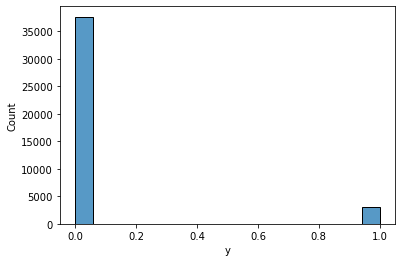

In [143]:
import seaborn as sns
sns.histplot(bank2['y']) #here we can see that our data is Unbalanced data in which 0= 88.3%  &  1= 11.69%

In [144]:
bank2.columns

Index(['day', 'month', 'duration', 'age', 'job', 'marital', 'education',
       'poutcome', 'default', 'balance', 'housing', 'loan', 'campaign',
       'pdays', 'previous', 'y', 'anomaly'],
      dtype='object')

In [145]:
bank2=bank2.drop(['anomaly'],axis=1)
bank2

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous,y
0,1.133333,1.818182,1.053070,1.519481,1.363636,1.5,1.666667,2.0,1.0,1.092259,2.0,1.0,1.000000,1.0,1.0,0
1,1.133333,1.818182,1.030704,1.337662,1.818182,2.0,1.333333,2.0,1.0,1.073067,2.0,1.0,1.000000,1.0,1.0,0
2,1.133333,1.818182,1.015453,1.194805,1.181818,1.5,1.333333,2.0,1.0,1.072822,2.0,2.0,1.000000,1.0,1.0,0
3,1.133333,1.818182,1.018707,1.376623,1.090909,1.5,2.000000,2.0,1.0,1.086476,2.0,1.0,1.000000,1.0,1.0,0
4,1.133333,1.818182,1.040260,1.194805,2.000000,2.0,2.000000,2.0,1.0,1.072812,1.0,1.0,1.000000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,1.533333,1.000000,1.045547,1.207792,1.000000,2.0,1.333333,2.0,1.0,1.077860,1.0,1.0,1.000000,1.0,1.0,1
45203,1.533333,1.000000,1.054087,1.064935,1.727273,2.0,1.666667,2.0,1.0,1.073829,1.0,1.0,1.000000,1.0,1.0,1
45205,1.533333,1.000000,1.078487,1.090909,1.818182,2.0,1.333333,2.0,1.0,1.077388,1.0,2.0,1.016129,1.0,1.0,1
45206,1.533333,1.000000,1.198658,1.428571,1.818182,1.5,1.666667,2.0,1.0,1.080293,1.0,1.0,1.032258,1.0,1.0,1


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X=bank2.iloc[:,:-1]
Y=bank2.iloc[:,-1:]
X.head()

,day,month,duration,age,job,marital,education,poutcome,default,balance,housing,loan,campaign,pdays,previous
0,1.133333,1.818182,1.053070,1.519481,1.363636,1.5,1.666667,2.0,1.0,1.092259,2.0,1.0,1.0,1.0,1.0
1,1.133333,1.818182,1.030704,1.337662,1.818182,2.0,1.333333,2.0,1.0,1.073067,2.0,1.0,1.0,1.0,1.0
2,1.133333,1.818182,1.015453,1.194805,1.181818,1.5,1.333333,2.0,1.0,1.072822,2.0,2.0,1.0,1.0,1.0
3,1.133333,1.818182,1.018707,1.376623,1.090909,1.5,2.000000,2.0,1.0,1.086476,2.0,1.0,1.0,1.0,1.0
4,1.133333,1.818182,1.040260,1.194805,2.000000,2.0,2.000000,2.0,1.0,1.072812,1.0,1.0,1.0,1.0,1.0


In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [148]:
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Model1 Creation using Logistic Regression

In [149]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
y_pred=model1.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
cm


array([[11213,    66],
       [  871,    57]], dtype=int64)

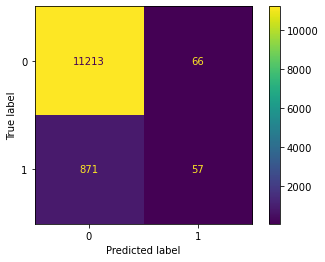

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(cm,display_labels=model1.classes_)
disp.plot()
plt.show()

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11279
           1       0.46      0.06      0.11       928

    accuracy                           0.92     12207
   macro avg       0.70      0.53      0.53     12207
weighted avg       0.89      0.92      0.90     12207



In [154]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
test_accuracy_model1=accuracy*100
test_accuracy_model1

92.32407634963545

In [155]:
y_pred_train=model1.predict(x_train)

In [156]:
print(classification_report(y_train,y_pred_train)) #to know how much accuracy is been given by the model
#sensitivity is high 0.98 but specificity is very low 0.20

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     26412
           1       0.52      0.08      0.14      2071

    accuracy                           0.93     28483
   macro avg       0.72      0.54      0.55     28483
weighted avg       0.90      0.93      0.90     28483



In [157]:
accuracy3=accuracy_score(y_train,y_pred_train)
train_accuracy_model1=accuracy3*100
train_accuracy_model1

92.76410490467998

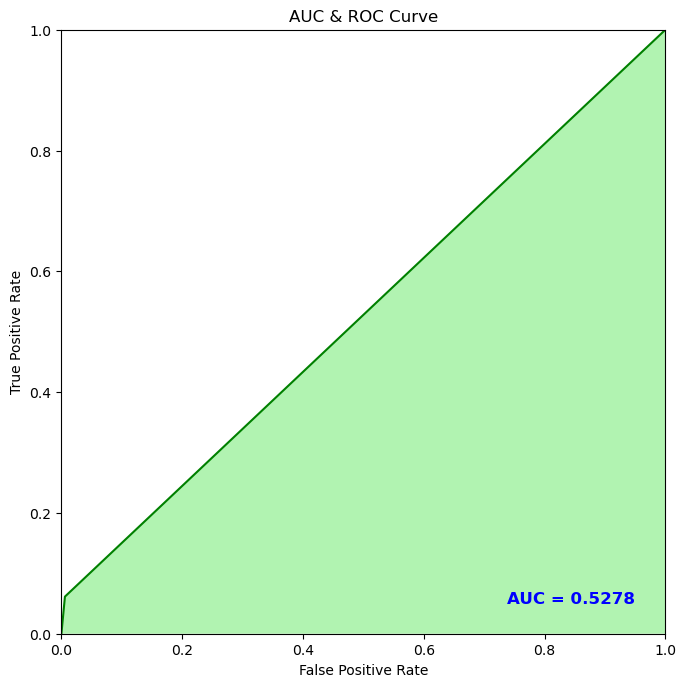

In [158]:

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Cross Validation of Model1

In [159]:
cv= RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
n_scores=cross_val_score(model1,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)

In [160]:
from numpy import mean
from numpy import std
Mean_Accuracy_model1=mean(n_scores)*100
Mean_Accuracy_model1

92.66732202834439

In [161]:
from sklearn.metrics import log_loss
log_loss1=log_loss(y_test,y_pred)
log_loss1

2.651174429053962

### In the y variable, we have '0' for customers who are not taking Term Deposit and '1' for customers who are accepting Term Deposit.
### by the Odds Ratio that is P/(1-P) => probability of Success for company/ probability of failure for company
### the model is going to predict in terms of Probability of (y=1) so carefully take y=1 & y=0 according to what is going to be succes for company
### here success for the company is "customer taking Term Deposit ", hence y=1 for 'customer taking Term Deposit

# Model2 Using XGBOOST Because the data in y column is highly uneven, there are a greater number of persons who will not register in term deposits.

In [162]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [163]:
y_pred2=model2.predict(x_test)

In [164]:
#Confusion Matrix
cm2=confusion_matrix(y_test,y_pred2) 
cm2


array([[11049,   230],
       [  658,   270]], dtype=int64)

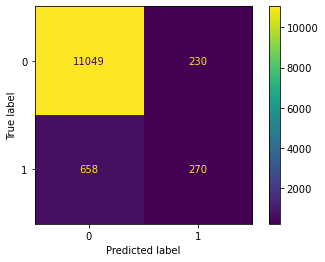

In [165]:

#Displaying Confusion Matrix
disp2=ConfusionMatrixDisplay(cm2,display_labels=model2.classes_)
disp2.plot()
plt.show()


In [166]:

#Classification Report
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11279
           1       0.54      0.29      0.38       928

    accuracy                           0.93     12207
   macro avg       0.74      0.64      0.67     12207
weighted avg       0.91      0.93      0.92     12207



In [167]:

#Accuracy
accuracy2= accuracy_score(y_test,y_pred2)
test_accuracy_model2=accuracy2*100
test_accuracy_model2


92.72548537724256

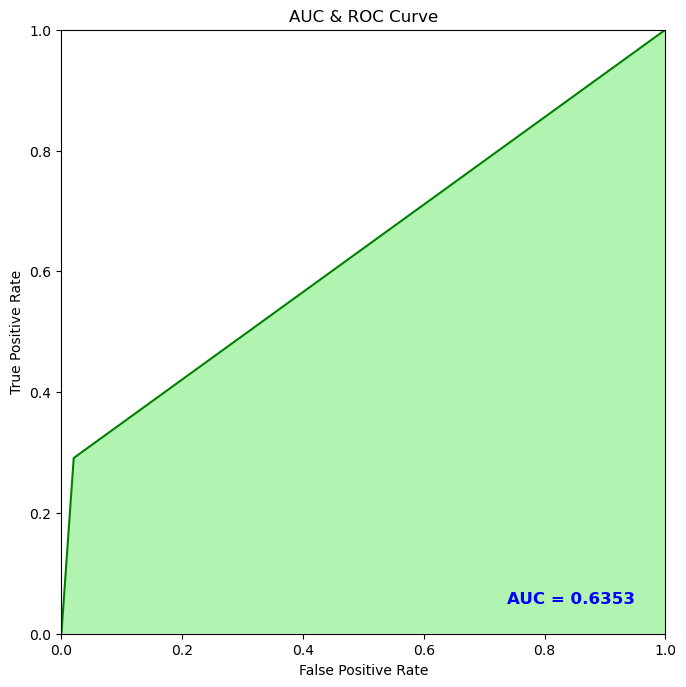

In [168]:

# AUC-ROC Curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [169]:

# Cross Validation of Model

cv2= RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
n_scores2=cross_val_score(model2,X,Y,scoring='accuracy',cv=cv2,n_jobs=-1)


Mean_Accuracy_model2=mean(n_scores)*100
Mean_Accuracy_model2




92.66732202834439

In [170]:
#Binary Cross Entropy
log_loss2=log_loss(y_test,y_pred2)
log_loss2

2.51254340510278

# Model3 using Random Forest

In [171]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

max_features=3
num_trees=50
kfold=KFold(n_splits=15)


In [172]:

RF=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
model3=RF.fit(x_train,y_train.values.ravel())

In [173]:

y_pred3=model3.predict(x_test)


In [174]:

#Confusion Matrix
cm3=confusion_matrix(y_test,y_pred3) 
cm3


array([[11159,   120],
       [  789,   139]], dtype=int64)

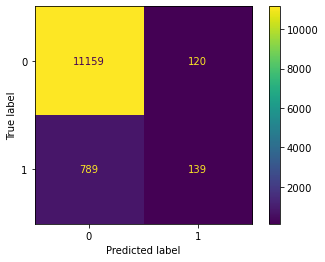

In [175]:
#Displaying Confusion Matrix
disp3=ConfusionMatrixDisplay(cm3,display_labels=model3.classes_)
disp3.plot()
plt.show()


In [176]:

#Classification Report
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11279
           1       0.54      0.15      0.23       928

    accuracy                           0.93     12207
   macro avg       0.74      0.57      0.60     12207
weighted avg       0.90      0.93      0.91     12207



In [177]:

#Accuracy
accuracy3= accuracy_score(y_test,y_pred3)
test_accuracy_model3=accuracy3*100
test_accuracy_model3


92.55345293683952

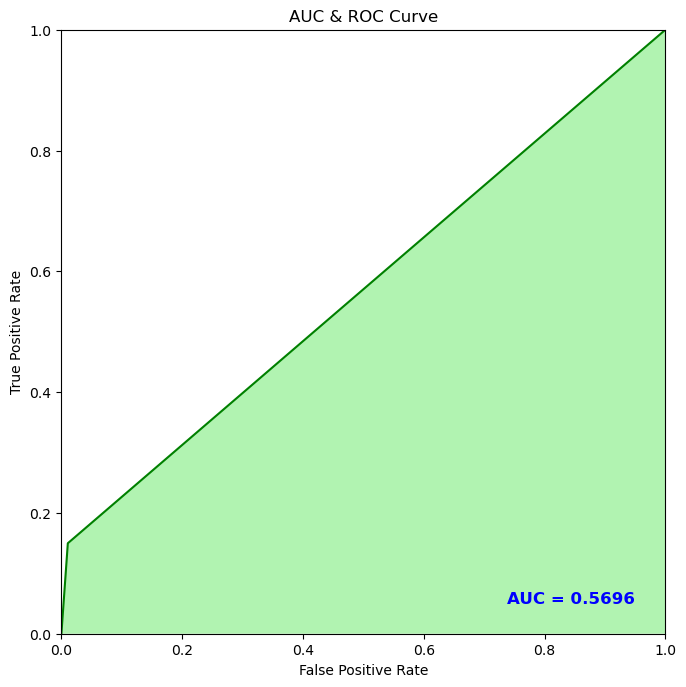

In [178]:

# AUC-ROC Curve
auc = metrics.roc_auc_score(y_test, y_pred3)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred3)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [179]:

# Cross Validation of Model3
n_scores3=cross_val_score(model3,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
Mean_Accuracy_model3=mean(n_scores3)*100
Mean_Accuracy_model3

92.99418366511017

In [180]:
#Binary Cross Entropy
log_loss3=log_loss(y_test,y_pred3)
log_loss3

2.571954099669488

# Model4 using Regularization method

In [181]:
#taking ridge L2 regression to regularize the model
from sklearn.linear_model import RidgeClassifier
ridgeR=RidgeClassifier(alpha=0.5)
model4=ridgeR.fit(x_train,y_train.values.ravel())
y_pred4=model4.predict(x_test)

In [182]:

#Confusion Matrix
cm4=confusion_matrix(y_test,y_pred4) 
cm4


array([[11242,    37],
       [  904,    24]], dtype=int64)

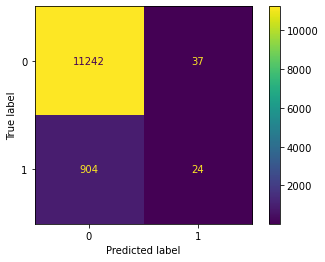

In [183]:

#Displaying Confusion Matrix
disp4=ConfusionMatrixDisplay(cm4,display_labels=model4.classes_)
disp4.plot()
plt.show()


In [184]:

#Classification Report
print(classification_report(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11279
           1       0.39      0.03      0.05       928

    accuracy                           0.92     12207
   macro avg       0.66      0.51      0.50     12207
weighted avg       0.89      0.92      0.89     12207



In [185]:

#Accuracy
accuracy4= accuracy_score(y_test,y_pred4)
test_accuracy_model4=accuracy4*100
test_accuracy_model4


92.29130826574917

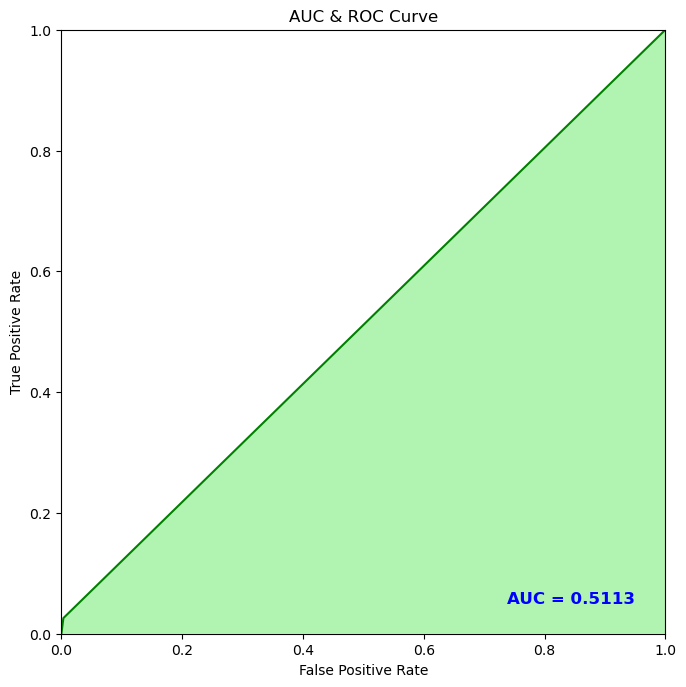

In [186]:

# AUC-ROC Curve
auc = metrics.roc_auc_score(y_test, y_pred4)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred4)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [187]:

# Cross Validation of Model
n_scores4=cross_val_score(model4,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
Mean_Accuracy_model4=mean(n_scores4)*100
Mean_Accuracy_model4

92.55918735151961

In [188]:
#Binary Cross Entropy
log_loss4=log_loss(y_test,y_pred4)
log_loss4

2.6624902246838595

# Model5 using Stocastic Gradient Descent classifier

In [189]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier()
model5=SGD.fit(x_train,y_train.values.ravel())
y_pred5=model5.predict(x_test)


In [190]:

#Confusion Matrix
cm5=confusion_matrix(y_test,y_pred5) 
cm5


array([[11263,    16],
       [  923,     5]], dtype=int64)

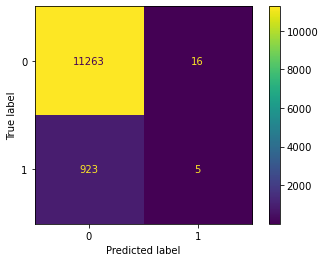

In [191]:

#Displaying Confusion Matrix
disp5=ConfusionMatrixDisplay(cm5,display_labels=model5.classes_)
disp5.plot()
plt.show()


In [192]:

#Classification Report
print(classification_report(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11279
           1       0.24      0.01      0.01       928

    accuracy                           0.92     12207
   macro avg       0.58      0.50      0.49     12207
weighted avg       0.87      0.92      0.89     12207



In [193]:

#Accuracy
accuracy5= accuracy_score(y_test,y_pred5)
test_accuracy_model5=accuracy5*100
test_accuracy_model5


92.3076923076923

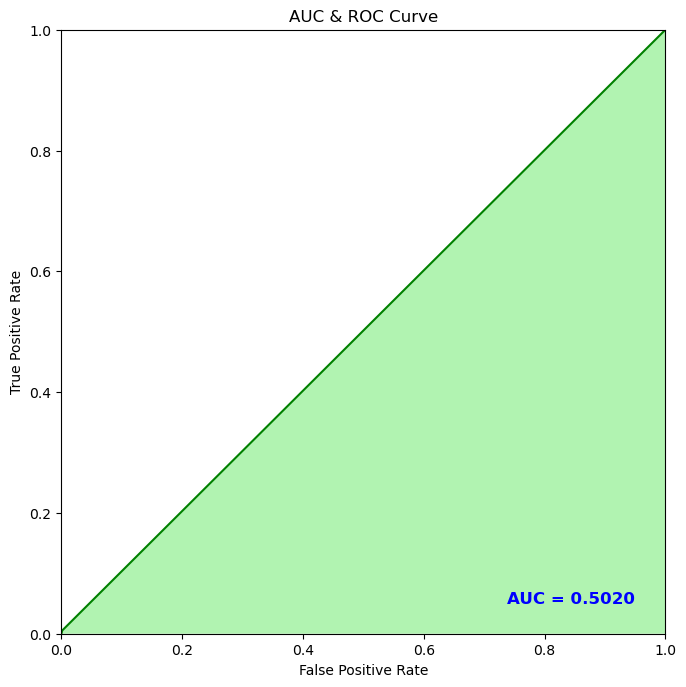

In [194]:

# AUC-ROC Curve
auc = metrics.roc_auc_score(y_test, y_pred5)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred5)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [195]:

# Cross Validation of Model
n_scores5=cross_val_score(model5,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
Mean_Accuracy_model5=mean(n_scores5)*100
Mean_Accuracy_model5



92.59031703121161

In [196]:
#Binary Cross Entropy
log_loss5=log_loss(y_test,y_pred5)
log_loss5

2.656830001505695

In [197]:
from tabulate import tabulate
table=[['Algorithm','Method','Model','Accuracy/Metrics','Binary Cross Entropy/Log-Loss'],
       ['Logistic Regression','LR Classifier','Model1',test_accuracy_model1,log_loss1],
       ['Xtreme Gradient Boosting ✓','XGB classifier','Model2',test_accuracy_model2,log_loss2],
       ['Random Forest','Random Forest Classifier','Model3',test_accuracy_model3,log_loss3],
       ['Ridge Rehularization','Ridge classifier','Model4 ',test_accuracy_model4,log_loss4],
       ['SGD(stochatic Gradient Descent)','SGD Classifier','Model5',test_accuracy_model5,log_loss5]]

In [198]:
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid',showindex=range(1,6)))

╒════╤═════════════════════════════════╤══════════════════════════╤═════════╤════════════════════╤═════════════════════════════════╕
│    │ Algorithm                       │ Method                   │ Model   │   Accuracy/Metrics │   Binary Cross Entropy/Log-Loss │
╞════╪═════════════════════════════════╪══════════════════════════╪═════════╪════════════════════╪═════════════════════════════════╡
│  1 │ Logistic Regression             │ LR Classifier            │ Model1  │            92.3241 │                         2.65117 │
├────┼─────────────────────────────────┼──────────────────────────┼─────────┼────────────────────┼─────────────────────────────────┤
│  2 │ Xtreme Gradient Boosting ✓      │ XGB classifier           │ Model2  │            92.7255 │                         2.51254 │
├────┼─────────────────────────────────┼──────────────────────────┼─────────┼────────────────────┼─────────────────────────────────┤
│  3 │ Random Forest                   │ Random Forest Classifier │ M

# We will utilise the XGBM model because it can handle high imbalance data in the dependent variable 'y' and 

from lazypredict.Supervised import LazyClassifier
d=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=d.fit(x_train,x_test,y_train,y_test)
print(models)
